In [10]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'combined_results.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['accuracy']

# 회귀 분석 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())
print('==============================================================================')


                                 OLS Regression Results                                
Dep. Variable:               accuracy   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              568.3
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                   2.92e-145
Time:                        16:19:05   Log-Likelihood:                         -40.023
No. Observations:                 288   AIC:                                      90.05
Df Residuals:                     283   BIC:                                      108.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
# 기본 통계 요약
summary_stats = df.describe()
print(summary_stats)
print('==============================================================================')

           Group       LSTM        conv  augmented       frame    accuracy
count  288.00000  288.00000  288.000000  288.00000  288.000000  288.000000
mean     0.50000    0.50000    3.500000    0.50000    6.000000    0.923353
std      0.50087    0.50087    1.710798    0.50087    3.421596    0.030575
min      0.00000    0.00000    1.000000    0.00000    1.000000    0.697339
25%      0.00000    0.00000    2.000000    0.00000    3.000000    0.917226
50%      0.50000    0.50000    3.500000    0.50000    6.000000    0.928331
75%      1.00000    1.00000    5.000000    1.00000    9.000000    0.941144
max      1.00000    1.00000    6.000000    1.00000   11.000000    0.955556


In [12]:
# 상관 계수 행렬
correlation_matrix = df.corr()
"""
                Group            LSTM            conv          augmented         frame       accuracy       
 Group       1.000000e+00,   -7.709882e-17,   -3.936596e-16,   2.004569e-17,   -8.848312e-17,   -0.065000
 LSTM       -7.709882e-17,    1.000000e+00,   -1.047351e-16,  -9.868649e-17,   -4.333867e-17,   -0.046270
 conv       -3.936596e-16,   -1.047351e-16,    1.000000e+00,  -2.979534e-17,   -9.146123e-17,   -0.028995
 augmented   2.004569e-17,    -9.868649e-17,  -2.979534e-17,   1.000000e+00,   -2.166933e-17,   -0.021867
 frame      -8.848312e-17,   -4.333867e-17,   -9.146123e-17,  -2.166933e-17,    1.000000e+00,    0.014138
 accuracy   -6.499983e-02,   -4.626967e-02,   -2.899483e-02,  -2.186741e-02,    1.413817e-02,    1.000000
"""

'\n                Group            LSTM            conv          augmented         frame       accuracy       \n Group       1.000000e+00,   -7.709882e-17,   -3.936596e-16,   2.004569e-17,   -8.848312e-17,   -0.065000\n frame      -7.709882e-17,    1.000000e+00,   -1.047351e-16,  -9.868649e-17,   -4.333867e-17,   -0.046270\n LSTM       -3.936596e-16,   -1.047351e-16,    1.000000e+00,  -2.979534e-17,   -9.146123e-17,   -0.028995\n augmented   2.004569e-17,    -9.868649e-17,  -2.979534e-17,   1.000000e+00,   -2.166933e-17,   -0.021867\n conv       -8.848312e-17,   -4.333867e-17,   -9.146123e-17,  -2.166933e-17,    1.000000e+00,    0.014138\n accuracy   -6.499983e-02,   -4.626967e-02,   -2.899483e-02,  -2.186741e-02,    1.413817e-02,    1.000000\n'

Group별 accuracy 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.925337
1    0.921369
Name: accuracy, dtype: float64


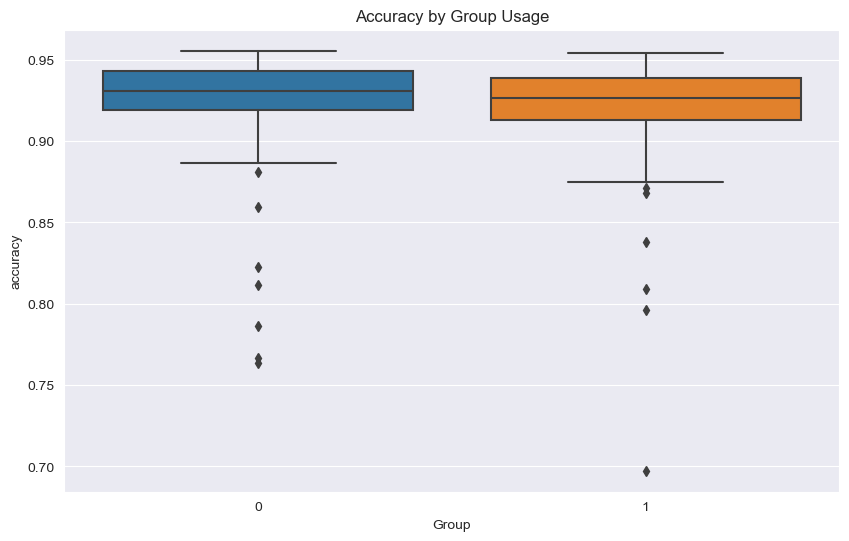

In [13]:
# Group에 따른 accuracy 평균 계산
group_Group = df.groupby('Group')['accuracy'].mean()
print("Group별 accuracy 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 accuracy 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='accuracy', data=df)
plt.title('Accuracy by Group Usage')
plt.show()

LSTM별 accuracy 평균 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.924766
1    0.921941
Name: accuracy, dtype: float64


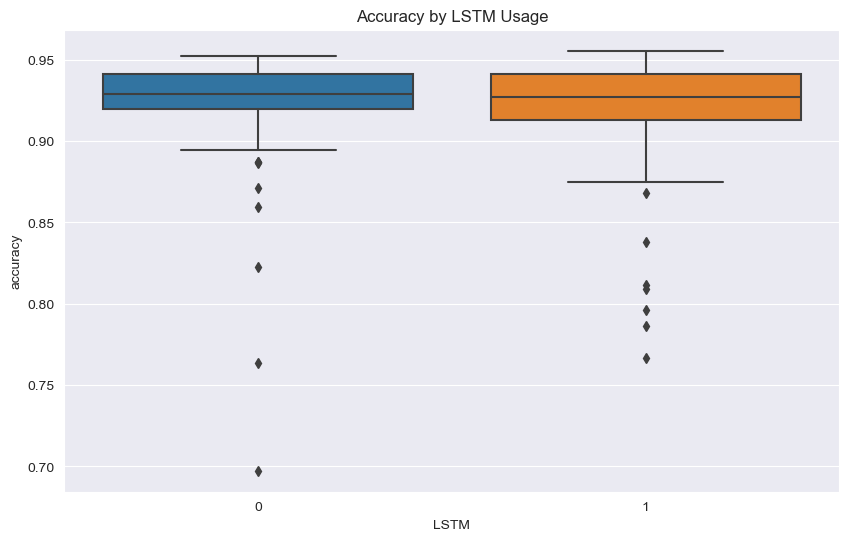

In [14]:
# LSTM에 따른 accuracy 평균 계산
LSTM_Group = df.groupby('LSTM')['accuracy'].mean()
print("LSTM별 accuracy 평균", "0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='accuracy', data=df)
plt.title('Accuracy by LSTM Usage')
plt.show()

augmented별 accuracy 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.924021
1    0.922686
Name: accuracy, dtype: float64


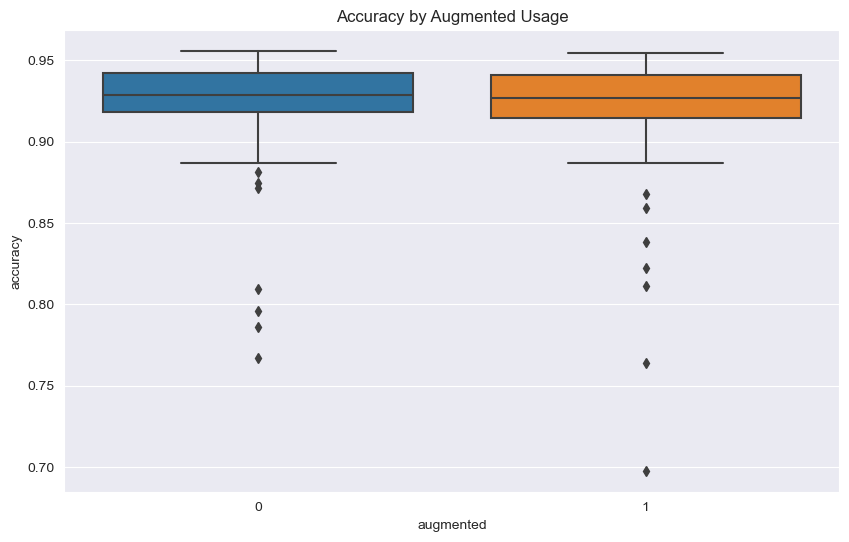

In [15]:
# augmented에 따른 accuracy 평균 계산
augmented_Group = df.groupby('augmented')['accuracy'].mean()
print("augmented별 accuracy 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='accuracy', data=df)
plt.title('Accuracy by Augmented Usage')
plt.show()

conv별 accuracy 평균
conv
1    0.928928
2    0.921981
3    0.923168
4    0.916604
5    0.924091
6    0.925348
Name: accuracy, dtype: float64


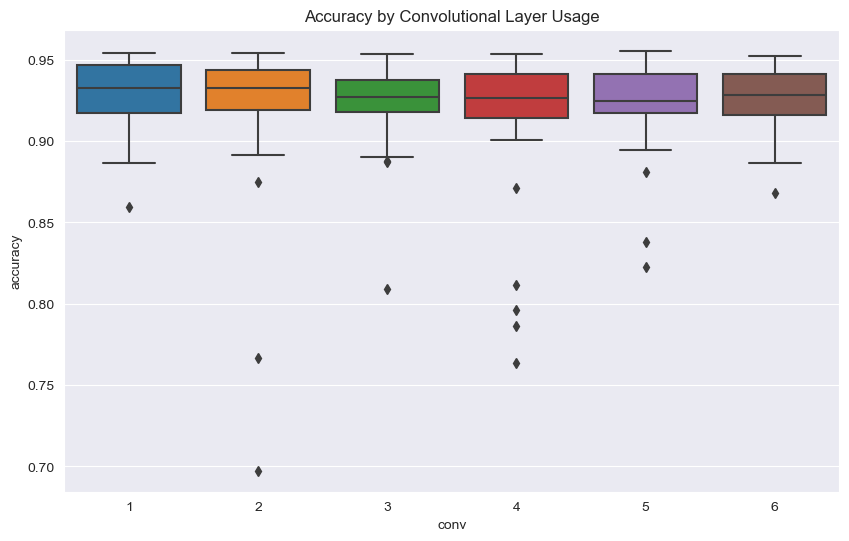

In [16]:
# conv에 따른 accuracy 평균 계산
conv_Group = df.groupby('conv')['accuracy'].mean()
print("conv별 accuracy 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='accuracy', data=df)
plt.title('Accuracy by Convolutional Layer Usage')
plt.show()

frame별 accuracy 평균
frame
1     0.894979
3     0.942245
5     0.942302
7     0.927293
9     0.920512
11    0.912790
Name: accuracy, dtype: float64


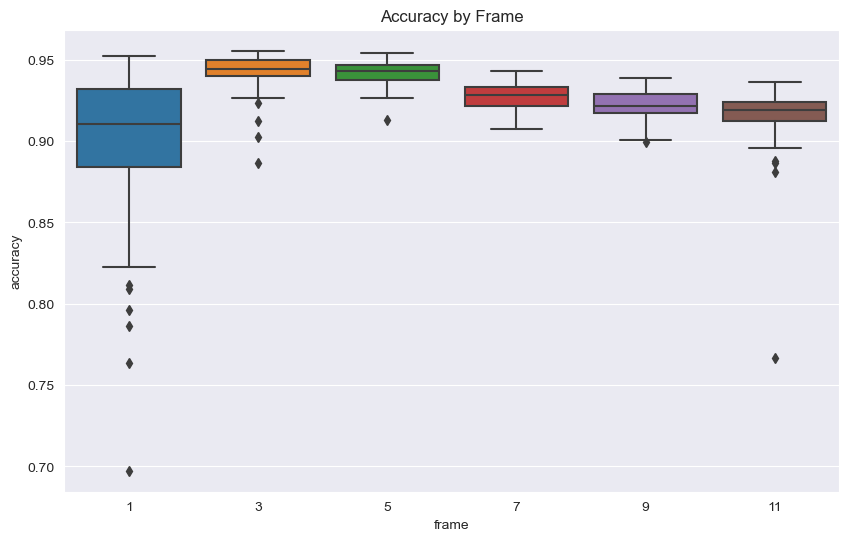

In [17]:
# frame에 따른 accuracy 평균 계산
frame_Group = df.groupby('frame')['accuracy'].mean()
print("frame별 accuracy 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='accuracy', data=df)
plt.title('Accuracy by Frame')
plt.show()